I. Chapter 1

1. Preparing data to the next step

In [1]:
import pandas as pd

In [2]:
ri = pd.read_csv('RI-clean_data\RI_cleaned.csv')
ri.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [3]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [4]:
ri.shape

(509681, 26)

In [5]:
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [6]:
ri.head(2)

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [7]:
ri.shape

(509681, 24)

In [8]:
ri.isnull().sum()

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [9]:
ri.dropna(subset=['driver_gender'], inplace=True)

In [10]:
ri.isnull().sum()

id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department             0
driver_gender                 0
driver_age_raw                1
driver_age                 1638
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          462822
search_type              462822
contraband_found              0
stop_outcome                  0
is_arrested                   0
stop_duration                 0
out_of_state                808
drugs_related_stop            0
district                      0
dtype: int64

In [11]:
ri.shape

(480584, 24)

2. Finding an incorrect data type

In [12]:
ri.dtypes

id                        object
stop_date                 object
stop_time                 object
location_raw              object
county_fips              float64
fine_grained_location    float64
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted          object
search_type_raw           object
search_type               object
contraband_found            bool
stop_outcome              object
is_arrested               object
stop_duration             object
out_of_state              object
drugs_related_stop          bool
district                  object
dtype: object

In [13]:
ri.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [14]:
ri.is_arrested.dtype

dtype('O')

In [15]:
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri['search_conducted'] = ri.is_arrested.astype('bool')

In [16]:
ri.is_arrested.dtype
ri.search_conducted.dtype

dtype('bool')

In [17]:
ri.stop_date.head()

0    2005-01-02
1    2005-01-02
3    2005-01-04
4    2005-01-06
5    2005-01-12
Name: stop_date, dtype: object

In [18]:
ri.stop_date.dtype

dtype('O')

In [19]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [20]:
combined[5]

'2005-01-12 08:05'

In [21]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [22]:
ri.dtypes

id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                   bool
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


In [23]:
ri.set_index('stop_datetime', inplace=True)

In [24]:
ri.index.dtype

dtype('<M8[ns]')

In [25]:
ri.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

II Chapter 2 Exploring the relationship between gender and policing

II.1 

In [26]:
ri.violation.value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [27]:
ri.violation.value_counts(normalize=True)

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64

In [28]:
female = ri[ri.driver_gender == 'F']
male = ri[ri.driver_gender == 'M']

In [29]:
female.violation.value_counts(normalize=True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

In [30]:
male.violation.value_counts(normalize=True)

Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64

In [31]:
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

In [32]:
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [33]:
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64

In [34]:
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64

In [35]:
ri.search_conducted.dtype

dtype('bool')

In [36]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)
print(' ')
# Calculate the search rate by counting the values

print(ri.search_conducted.value_counts(normalize=True))
print(' ')
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
 
False    0.965452
True     0.034548
Name: search_conducted, dtype: float64
 
0.03454755048024903


In [37]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.025492229559700468
0.03794577702992737


In [38]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.061614
               Moving violation       0.054380
               Other                  0.115273
               Registration/plates    0.078598
               Seat belt              0.021972
               Speeding               0.006323
M              Equipment              0.060028
               Moving violation       0.058008
               Other                  0.073684
               Registration/plates    0.088781
               Seat belt              0.028026
               Speeding               0.017032
Name: search_conducted, dtype: float64


In [39]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.061614
                     M                0.060028
Moving violation     F                0.054380
                     M                0.058008
Other                F                0.115273
                     M                0.073684
Registration/plates  F                0.078598
                     M                0.088781
Seat belt            F                0.021972
                     M                0.028026
Speeding             F                0.006323
                     M                0.017032
Name: search_conducted, dtype: float64


In [40]:
# Count the 'search_type' values
#print(ri.search_type == 'F'.search_conducted.mean())

In [41]:
ri.search_type.value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [42]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [43]:
print(ri['frisk'].dtype)

bool


In [44]:
ri['frisk'].astype('str').head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: frisk, dtype: object

In [45]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [46]:
# Check the data type of 'frisk'
print(ri['frisk'].dtype)

bool


In [47]:
# Take the sum of 'frisk'
print(ri['frisk'].sum())

1598


In [48]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

In [49]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.021261217852195386


In [50]:
# Calculate the frisk rate for each gender
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.008974
M    0.024359
Name: frisk, dtype: float64

III Chapter 3 Visual exploratory data analysis

In [51]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.03454755048024903


In [52]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


In [53]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [54]:
hourly_arrest_rate

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [55]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

In [56]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('Y').mean())

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


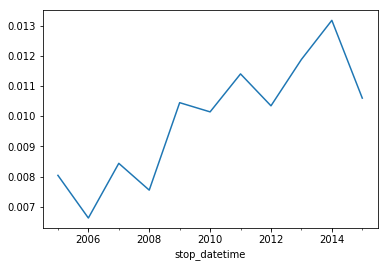

In [57]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

In [58]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.068289
2006-12-31,0.006624,0.043491
2007-12-31,0.008437,0.030176
2008-12-31,0.007549,0.028089
2009-12-31,0.010447,0.038398
2010-12-31,0.010142,0.038616
2011-12-31,0.011400,0.035538
2012-12-31,0.010343,0.035124
2013-12-31,0.011879,0.029316


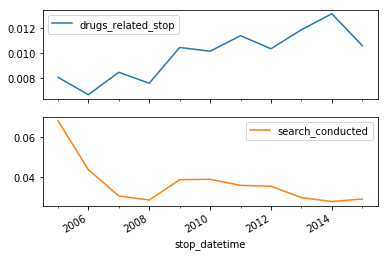

In [59]:
# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [60]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   
Zone X1         1725              3711    752                  192        451   
Zone X3        11520             17178   4069                 3532       4445   
Zone X4        19975             29554   8865                 7551       4870   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  
Zone X1        6393  
Zone X3       48687  
Zone X4       54855  


In [61]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  


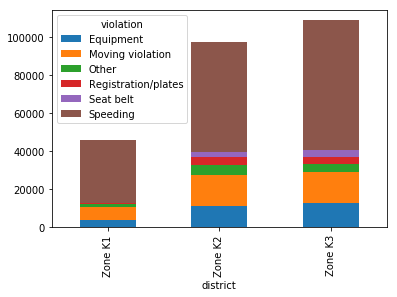

In [62]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

In [63]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']


In [64]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

[ 8. 23. 45. nan]


In [65]:
ri[ri.stop_duration == '2']

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-23 11:17:00,RI-2012-04445,2012-01-23,11:17,Zone X4,NaN,NaN,500,M,1960.0,52.0,...,NaN,False,Arrest Passenger,True,2,False,False,Zone X4,False,NaN


In [66]:
ri.stop_minutes.dropna().head()

stop_datetime
2005-01-02 01:55:00     8.0
2005-01-02 20:30:00    23.0
2005-01-04 12:55:00     8.0
2005-01-06 01:30:00     8.0
2005-01-12 08:05:00    45.0
Name: stop_minutes, dtype: float64

In [67]:
ri.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district',
       'frisk', 'stop_minutes'],
      dtype='object')

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64


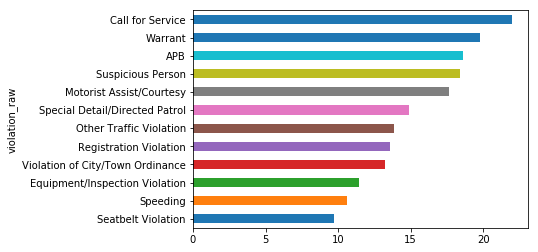

In [68]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

IV Chapter 4 Exploring the weather dataset

In [69]:
# Read 'RI-weather.csv' into a DataFrame named 'weather' from https://www.ncdc.noaa.gov/cdo-web/
weather = pd.read_csv('RI-clean_data\RI-weather.csv')

In [70]:
weather.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'FMTM', 'PGTM', 'PRCP', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF2', 'WDF5', 'WESD', 'WSF2',
       'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08',
       'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18',
       'WT19', 'WT21', 'WT22', 'WV20'],
      dtype='object')

In [71]:
weather = weather[['DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01', 'WT02', 'WT03', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']]

In [72]:
weather.head(2)

,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,2005-01-01,6.7,1.7,11.7,4.0,11.2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-02,2.2,-2.2,6.7,4.2,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [73]:
# Describe the temperature columns
weather[['TAVG','TMIN','TMAX']].describe()

,TAVG,TMIN,TMAX
count,2247.000000,5076.000000,5076.000000
mean,11.725545,6.539854,16.430615
std,9.767662,9.449562,10.117940
min,-17.600000,-22.700000,-11.000000
25%,4.200000,-1.000000,8.300000
50%,12.300000,6.700000,17.200000
75%,20.300000,14.400000,25.000000
max,29.900000,25.000000,38.900000


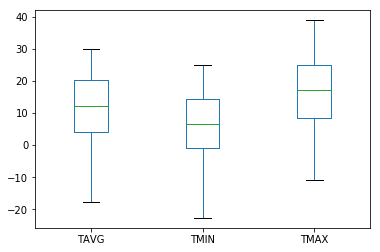

In [74]:
# Create a box plot of the temperature columns
weather[['TAVG','TMIN','TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    5076.000000
mean        9.890760
std         3.511647
min         1.100000
25%         7.700000
50%        10.000000
75%        12.200000
max        23.900000
Name: TDIFF, dtype: float64


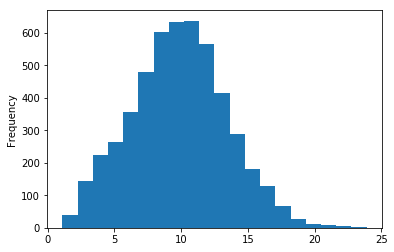

In [75]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

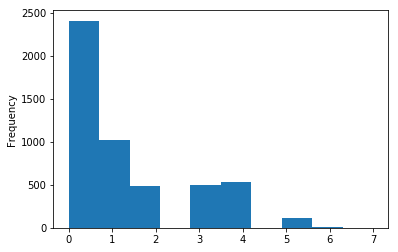

In [76]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

In [78]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

0    2408
1    1025
2     486
3     496
4     538
5     111
6       9
7       3
Name: bad_conditions, dtype: int64
bad      2545
good     2408
worse     123
Name: rating, dtype: int64


In [79]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [80]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', ordered=True,
categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [82]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head(2))

   index       stop_datetime             id   stop_date stop_time  \
0      0 2005-01-02 01:55:00  RI-2005-00001  2005-01-02     01:55   
1      1 2005-01-02 20:30:00  RI-2005-00002  2005-01-02     20:30   

  location_raw  county_fips  fine_grained_location police_department  \
0      Zone K1          NaN                    NaN               600   
1      Zone X4          NaN                    NaN               500   

  driver_gender      ...       search_type  contraband_found stop_outcome  \
0             M      ...               NaN             False     Citation   
1             M      ...               NaN             False     Citation   

  is_arrested stop_duration out_of_state  drugs_related_stop district  frisk  \
0       False      0-15 Min        False               False  Zone K1  False   
1       False     16-30 Min        False               False  Zone X4  False   

   stop_minutes  
0           8.0  
1          23.0  

[2 rows x 28 columns]


In [87]:
ri.drop('id', axis=1).head(2)

,index,stop_datetime,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
0,0,2005-01-02 01:55:00,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,8.0
1,1,2005-01-02 20:30:00,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,23.0


In [93]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [102]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

(480584, 28)


In [103]:
# Examine the shape of 'ri_weather'
print(ri_weather.shape)

(480584, 30)


In [104]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)
ri_weather.head(2)

,index,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,0,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,Citation,False,0-15 Min,False,False,Zone K1,False,8.0,2005-01-02,bad
2005-01-02 20:30:00,1,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,Citation,False,16-30 Min,False,False,Zone X4,False,23.0,2005-01-02,bad


In [106]:
drop_col=['index','id', 'stop_date','stop_time']
ri_weather.drop(drop_col, axis=1).head(2)

,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,Zone K1,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,...,Citation,False,0-15 Min,False,False,Zone K1,False,8.0,2005-01-02,bad
2005-01-02 20:30:00,Zone X4,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,...,Citation,False,16-30 Min,False,False,Zone X4,False,23.0,2005-01-02,bad


In [108]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())


0.03454755048024903
rating
good     0.033026
bad      0.035633
worse    0.043487
Name: is_arrested, dtype: float64


In [110]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            good      0.056515
                     bad       0.062836
                     worse     0.103950
Moving violation     good      0.055792
                     bad       0.057844
                     worse     0.078736
Other                good      0.082726
                     bad       0.078640
                     worse     0.071730
Registration/plates  good      0.077532
                     bad       0.093608
                     worse     0.091566
Seat belt            good      0.025713
                     bad       0.028677
                     worse     0.000000
Speeding             good      0.013200
                     bad       0.013798
                     worse     0.017426
Name: is_arrested, dtype: float64


In [111]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.056515
                     bad       0.062836
                     worse     0.103950
Moving violation     good      0.055792
                     bad       0.057844
                     worse     0.078736
Other                good      0.082726
                     bad       0.078640
                     worse     0.071730
Registration/plates  good      0.077532
                     bad       0.093608
                     worse     0.091566
Seat belt            good      0.025713
                     bad       0.028677
                     worse     0.000000
Speeding             good      0.013200
                     bad       0.013798
                     worse     0.017426
Name: is_arrested, dtype: float64


In [121]:
# Print the arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation','bad'].mean()

0.057843750674232454

In [123]:
# Print the arrest rates for speeding violations in all three weather conditions
arrest_rate.loc['Speeding']

rating
good     0.013200
bad      0.013798
worse    0.017426
Name: is_arrested, dtype: float64

In [124]:
arrest_rate.head(2)

violation  rating
Equipment  good      0.056515
           bad       0.062836
Name: is_arrested, dtype: float64

In [125]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.056515  0.062836  0.103950
Moving violation     0.055792  0.057844  0.078736
Other                0.082726  0.078640  0.071730
Registration/plates  0.077532  0.093608  0.091566
Seat belt            0.025713  0.028677  0.000000
Speeding             0.013200  0.013798  0.017426


In [127]:
# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.056515  0.062836  0.103950
Moving violation     0.055792  0.057844  0.078736
Other                0.082726  0.078640  0.071730
Registration/plates  0.077532  0.093608  0.091566
Seat belt            0.025713  0.028677  0.000000
Speeding             0.013200  0.013798  0.017426
